# SPARC-4 products
***

This notebook shows an example for viewing and accessing the SPARC4 data products.

* Eder Martioli, LNA 18 Apr 2024

In [1]:
from astropy.io import fits, ascii
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sparc4.product_plots as s4plt
import sparc4.pipeline_lib as s4pipelib

### Set paths to example files 
Below we set the paths to example files, which are sparc4-pipeline products obtained from the reduction of data in the [minidata package](https://drive.google.com/file/d/1tAVjyhYGMDcrU5sDdGCmd_f5HoazZ294/view?usp=drive_link).

In [2]:
db_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250309/sparc4acs3/20250309_sparc4acs3_db.csv'

phot_lightcurve_example ='/media/fernando/KINGSTON/Doutorado/2025/reduced/20250309/sparc4acs3/20250309_s4c3_v1025cen_POLAR_L4_S+N_lc.fits'

polar_stack_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250309/sparc4acs3/20250309_s4c3_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_stack.fits'

polar_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250309/sparc4acs3/20250309_s4c3_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_polar.fits'

polar_time_series_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250309/sparc4acs3/20250309_s4c3_v1025cen_POLAR_L4_ts.fits'

# DB product example
***
In this simple example, we just read the database created by the `sparc4-pipelin` and print it as a pandas table. It's an easy way to quickly access the log of observations.

In [3]:
db = ascii.read(db_example)
pd.DataFrame(np.array(db))

,FILE,DATE-OBS,EXPTIME,RA,DEC,OBJECT,OBSTYPE,INSTMODE,CHANNEL,VBIN,...,VCLKAMP,CCDSERN,PREAMP,READRATE,EMMODE,EMGAIN,WPPOS,WPSEL,CALW,ASEL
0,/media/fernando/KINGSTON/Doutorado/2025/202503...,2025-03-10T03:10:48.025000,8.0,09:06:00.01,-47:18:58.17,Vela1-95,OBJECT,POLAR,3,1,...,Normal,9916,Gain 2,1.0,Conventional,2,1,L2,None,True
1,/media/fernando/KINGSTON/Doutorado/2025/202503...,2025-03-10T03:10:56.029499,8.0,09:06:00.01,-47:18:58.17,Vela1-95,OBJECT,POLAR,3,1,...,Normal,9916,Gain 2,1.0,Conventional,2,1,L2,None,True
2,/media/fernando/KINGSTON/Doutorado/2025/202503...,2025-03-10T03:11:06.589000,8.0,09:06:00.01,-47:18:58.17,Vela1-95,OBJECT,POLAR,3,1,...,Normal,9916,Gain 2,1.0,Conventional,2,2,L2,None,True
3,/media/fernando/KINGSTON/Doutorado/2025/202503...,2025-03-10T03:11:14.593499,8.0,09:06:00.01,-47:18:58.17,Vela1-95,OBJECT,POLAR,3,1,...,Normal,9916,Gain 2,1.0,Conventional,2,2,L2,None,True
4,/media/fernando/KINGSTON/Doutorado/2025/202503...,2025-03-10T03:11:24.995000,8.0,09:06:00.01,-47:18:58.17,Vela1-95,OBJECT,POLAR,3,1,...,Normal,9916,Gain 2,1.0,Conventional,2,3,L2,None,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1347,/media/fernando/KINGSTON/Doutorado/2025/202503...,2025-03-10T08:46:17.472827,0.3,12:38:16.18,-38:42:45.0,DOMEFLAT,FLAT,POLAR,3,1,...,Normal,9916,Gain 2,1.0,Conventional,2,16,L4,None,True
1348,/media/fernando/KINGSTON/Doutorado/2025/202503...,2025-03-10T08:46:18.892890,0.3,12:38:16.18,-38:42:45.0,DOMEFLAT,FLAT,POLAR,3,1,...,Normal,9916,Gain 2,1.0,Conventional,2,16,L4,None,True
1349,/media/fernando/KINGSTON/Doutorado/2025/202503...,2025-03-10T08:46:20.312953,0.3,12:38:16.18,-38:42:45.0,DOMEFLAT,FLAT,POLAR,3,1,...,Normal,9916,Gain 2,1.0,Conventional,2,16,L4,None,True
1350,/media/fernando/KINGSTON/Doutorado/2025/202503...,2025-03-10T08:46:21.733016,0.3,12:38:16.18,-38:42:45.0,DOMEFLAT,FLAT,POLAR,3,1,...,Normal,9916,Gain 2,1.0,Conventional,2,16,L4,None,True


# POLAR products example
***
In this example we show how to work with the polarimetric products of SPARC4

We start by reading the science image FITS file and showing its information. 

In [4]:
hdul = fits.open(polar_stack_example)
hdul.info()

Filename: /media/fernando/KINGSTON/Doutorado/2025/reduced/20250309/sparc4acs3/20250309_s4c3_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_stack.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     169   (1024, 1024)   float64   
  1  CATALOG_POL_S_AP005    1 TableHDU        51   92R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  2  CATALOG_POL_N_AP005    1 TableHDU        51   92R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  3  CATALOG_POL_S_AP008    1 TableHDU        51   92R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  4  CATALOG_POL_N_AP008    1 TableHDU        51   92R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  5  CATALOG_POL_S_AP010    1 TableHDU        51   92R x 13C   [I11, D25.17,

Then we plot the science frame using the `sparc4.product_plots` library

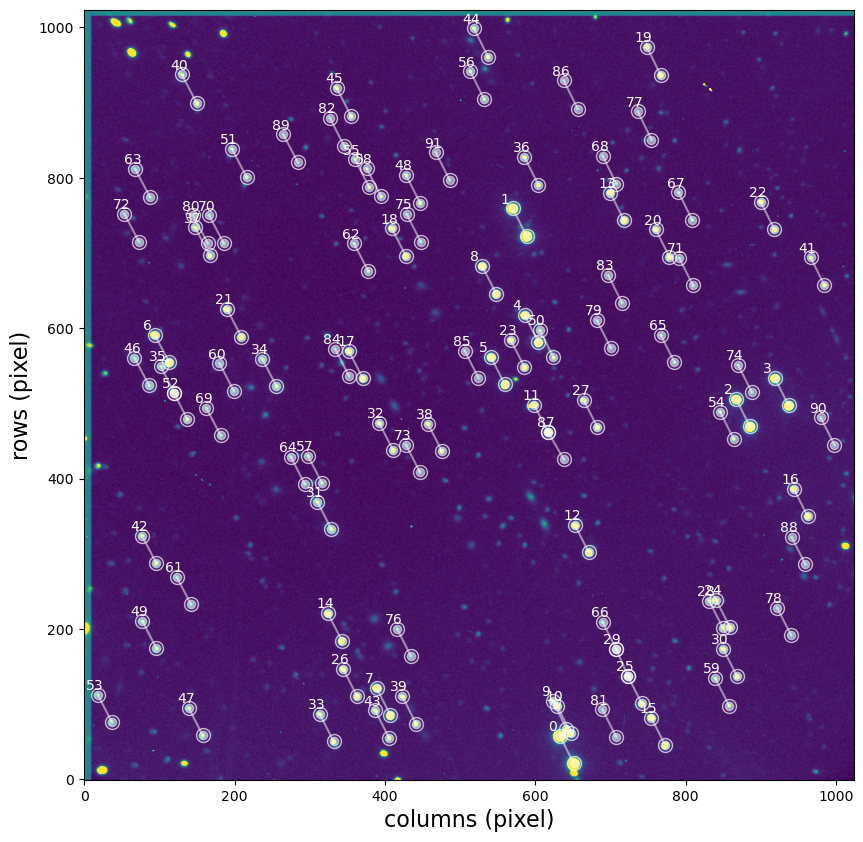

In [5]:
s4plt.plot_sci_polar_frame(polar_stack_example)

Now print one of the catalogs to see its contents

In [6]:
catalog = 'CATALOG_POL_N_AP010'
pd.DataFrame(hdul[catalog].data)

,SRCINDEX,RA,DEC,X,Y,FWHMX,FWHMY,MAG,EMAG,SKYMAG,ESKYMAG,APER,FLAG
0,0,189.553119,-38.759776,651.017412,21.267514,5.279077,5.279077,-10.787762,0.000864,-9.325144,0.000548,10,0
1,1,189.564767,-38.693863,588.401545,722.616211,4.695164,4.695164,-10.332747,0.001124,-9.314822,0.000521,10,0
2,2,189.527358,-38.716376,885.376065,469.247670,4.811005,4.811005,-10.084063,0.001321,-9.318874,0.000612,10,0
3,3,189.521304,-38.713486,936.825588,497.171171,4.740703,4.740703,-9.736024,0.001654,-9.320494,0.000587,10,0
4,4,189.562028,-38.707183,604.125209,581.123094,4.784866,4.784866,-9.049177,0.002649,-9.313693,0.000503,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,87,189.557402,-38.721668,637.890105,425.482100,5.006053,5.006053,-8.262905,0.004852,-9.313471,0.000487,10,0
88,88,189.517384,-38.733309,959.225677,286.026978,4.497311,4.497311,-5.119599,0.078253,-9.321131,0.000563,10,0
89,89,189.602222,-38.686048,284.242418,820.374124,4.887761,4.887761,-5.178860,0.072533,-9.311264,0.000476,10,0
90,90,189.513653,-38.718097,997.729698,445.116395,4.442454,4.442454,-5.190497,0.072820,-9.323587,0.000522,10,0


Below we select the source with index number 3 assigned as the main target to be analyzed. Then we select three other stars with indices 0, 1, and 2, as comparisons for differential photometry. All indices are displayed in the image above.  

After selecting the stars we use the function `s4plt.plot_light_curve` to produce plots of the lightcurve data.

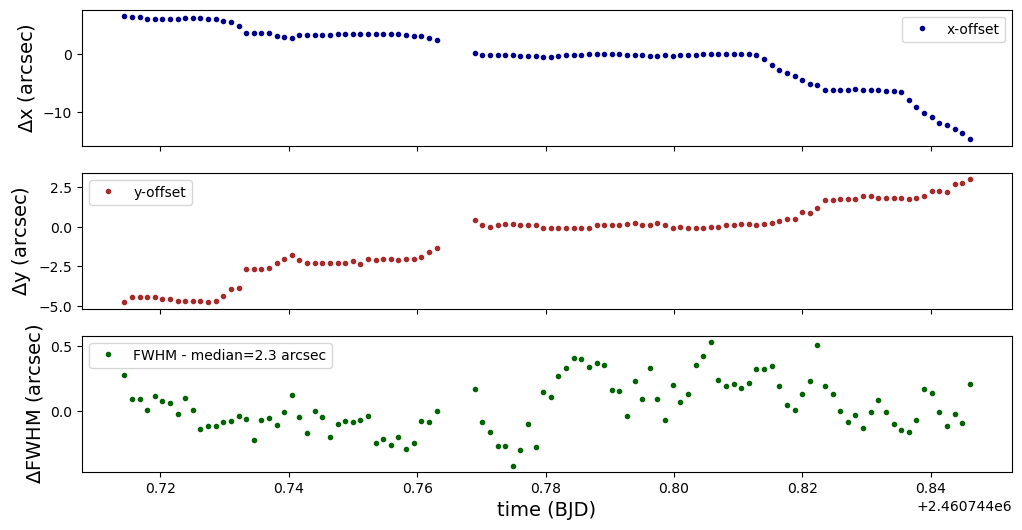

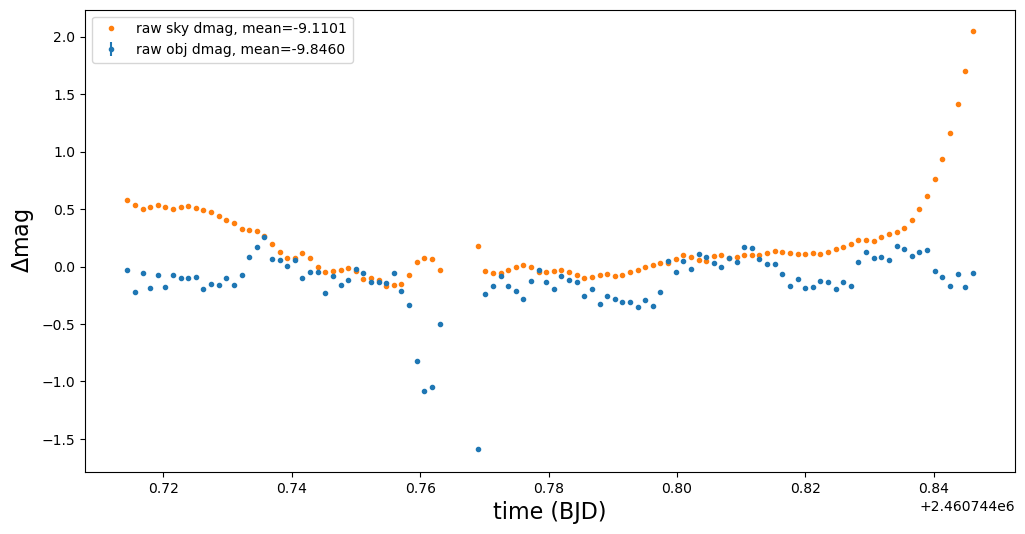

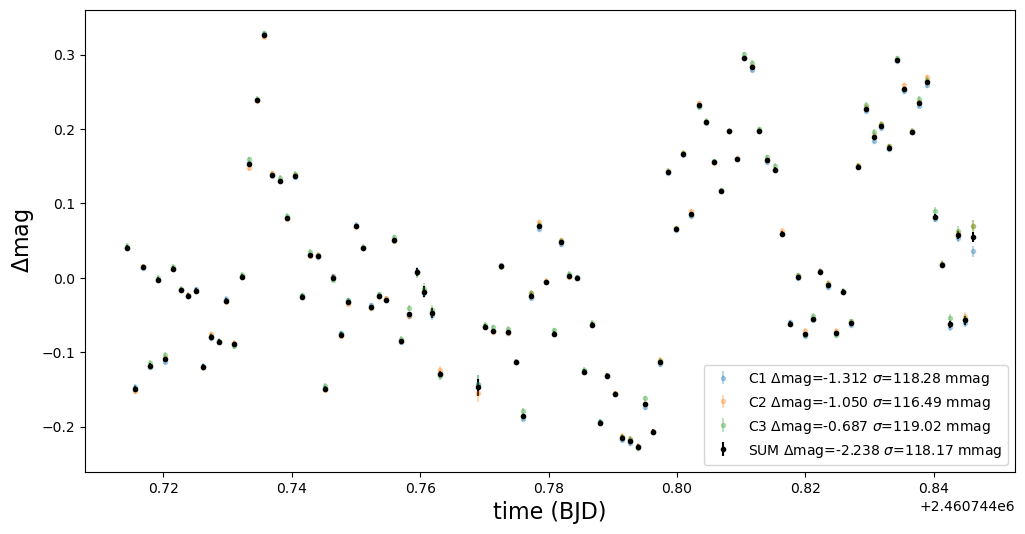

       TIME                x          ...       diffmagsum     
------------------ ------------------ ... ---------------------
2460744.7143804086  550.2183689387554 ...  0.040239815817540325
2460744.7155662794  549.4683689387554 ...  -0.14976003297715312
2460744.7167515825  549.4683689387554 ...  0.013807392777745342
2460744.7179377656  548.7183689387554 ...  -0.11852621208845182
2460744.7191244466  548.7183689387554 ... -0.002459974305826229
2460744.7203100626  548.7183689387554 ...  -0.10963778227272858
2460744.7214953657  548.4683689387554 ...  0.012001829459829416
               ...                ... ...                   ...
2460744.8389464817 499.46836893875536 ...   0.26340718660503715
 2460744.840134064 497.71836893875536 ...   0.08195594724899546
 2460744.841317353 494.71836893875536 ...  0.017354648873586065
2460744.8425046112 493.21836893875536 ...  -0.06249490097953103
2460744.8436899255 491.46836893875536 ...   0.05753663380330298
2460744.8448797883 489.46836893875536 ..

In [7]:
catalog = 'CATALOG_PHOT_AP010'
target=5
comps=[1,2,3]

lc = s4plt.plot_light_curve(phot_lightcurve_example, target=target, comps=comps, nsig=10,
                            plot_coords=True, plot_rawmags=True, plot_sum=True,
                            plot_comps=True, catalog_name=catalog)

print(lc)

Now we open a polarimetry FITS product and print its basic information

In [8]:
polar = fits.open(polar_example)
polar.info()

Filename: /media/fernando/KINGSTON/Doutorado/2025/reduced/20250309/sparc4acs3/20250309_s4c3_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_polar.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     675   ()      
  1  POLARIMETRY_AP005    1 BinTableHDU    946   92R x 467C   [D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, 

Below we print one of the catalog extensions

In [9]:
pd.DataFrame(polar["POLARIMETRY_AP010"].data)

ValueError: Big-endian buffer not supported on little-endian compiler

ValueError: Big-endian buffer not supported on little-endian compiler

Then we can print all column names to check the data available in each catalog

In [10]:
pd.DataFrame(polar["POLARIMETRY_AP010"].data).columns

Index(['APERINDEX', 'APER', 'SRCINDEX', 'RA', 'DEC', 'X1', 'Y1', 'X2', 'Y2',
       'FWHM',
       ...
       'FE0105', 'EFE0105', 'FO0106', 'EFO0106', 'FE0106', 'EFE0106', 'FO0107',
       'EFO0107', 'FE0107', 'EFE0107'],
      dtype='object', length=467)

Finally, we can select the source of interest (in this case index=0) and then we get the polarimetry results using the function `get_polarimetry_results` from `sparc4.pipeline_lib` library:

2025-09-18 01:02:41,798 astropop - INFO - Normalization disabled.  [__init__]


2025-09-18 01:02:41,798 | INFO | Normalization disabled.


/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/_deriv.py:29: RuntimeWarning: invalid value encountered in log
  return np.log(x)*np.power(x, y)
2025-09-18 01:02:41,809 root - INFO - Source index: i=5   [pipeline_lib]


2025-09-18 01:02:41,809 | INFO | Source index: i=5 


2025-09-18 01:02:41,811 root - INFO - Source RA=189.56711889158817 Dec=-38.71267576795583 mag=-14.9281+-0.0003  [pipeline_lib]


2025-09-18 01:02:41,811 | INFO | Source RA=189.56711889158817 Dec=-38.71267576795583 mag=-14.9281+-0.0003


2025-09-18 01:02:41,812 root - INFO - Best aperture radius: 10.0 pixels  [pipeline_lib]


2025-09-18 01:02:41,812 | INFO | Best aperture radius: 10.0 pixels


2025-09-18 01:02:41,813 root - INFO - Polarization in Q: 0.0010+-0.0006  [pipeline_lib]


2025-09-18 01:02:41,813 | INFO | Polarization in Q: 0.0010+-0.0006


2025-09-18 01:02:41,814 root - INFO - Polarization in U: -0.003+-0.001  [pipeline_lib]


2025-09-18 01:02:41,814 | INFO | Polarization in U: -0.003+-0.001


2025-09-18 01:02:41,815 root - INFO - Polarization in V: -0.0003+-0.0005  [pipeline_lib]


2025-09-18 01:02:41,815 | INFO | Polarization in V: -0.0003+-0.0005


2025-09-18 01:02:41,816 root - INFO - Total linear polarization p: 0.003+-0.001  [pipeline_lib]


2025-09-18 01:02:41,816 | INFO | Total linear polarization p: 0.003+-0.001


2025-09-18 01:02:41,817 root - INFO - Angle of polarization theta: 150+-10 deg  [pipeline_lib]


2025-09-18 01:02:41,817 | INFO | Angle of polarization theta: 150+-10 deg


/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/physical.py:99: RuntimeWarning: divide by zero encountered in log10
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/physical.py:99: RuntimeWarning: invalid value encountered in cast
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/physical.py:99: RuntimeWarning: overflow encountered in scalar negative
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
2025-09-18 01:02:41,819 root - INFO - Free constant k: 0.842261770270308+-0.0  [pipeline_lib]


2025-09-18 01:02:41,819 | INFO | Free constant k: 0.842261770270308+-0.0


2025-09-18 01:02:41,820 root - INFO - Zero of polarization: 27.2+-0.0  [pipeline_lib]


2025-09-18 01:02:41,820 | INFO | Zero of polarization: 27.2+-0.0


2025-09-18 01:02:41,821 root - INFO - RMS of zi residuals: 0.0049852973942102995  [pipeline_lib]


2025-09-18 01:02:41,821 | INFO | RMS of zi residuals: 0.0049852973942102995


2025-09-18 01:02:41,821 root - INFO - Reduced chi-square (n=108.0, DOF=105.0): 1.90  [pipeline_lib]


2025-09-18 01:02:41,821 | INFO | Reduced chi-square (n=108.0, DOF=105.0): 1.90


/home/fernando/anaconda3/lib/python3.12/site-packages/numpy/core/numeric.py:407: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(res, fill_value, casting='unsafe')
2025-09-18 01:02:41,906 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-18 01:02:41,906 | INFO | Substituting symbol \perp from STIXGeneral


2025-09-18 01:02:41,910 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-18 01:02:41,910 | INFO | Substituting symbol \perp from STIXGeneral


2025-09-18 01:02:42,119 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-18 01:02:42,119 | INFO | Substituting symbol \perp from STIXGeneral


2025-09-18 01:02:42,124 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-18 01:02:42,124 | INFO | Substituting symbol \perp from STIXGeneral


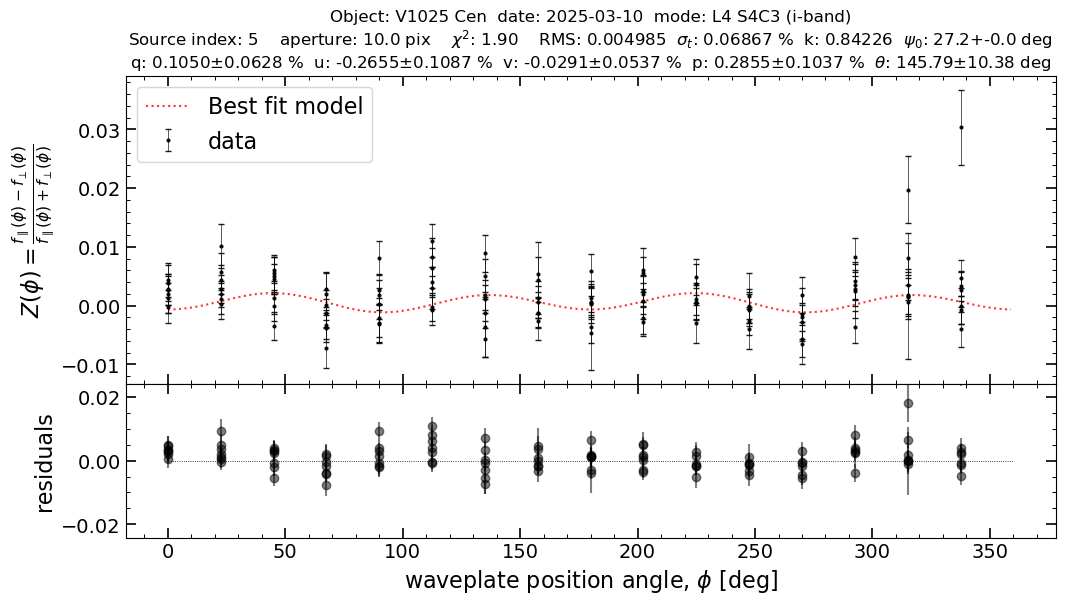

In [11]:
source_index = 5

pol_results = s4pipelib.get_polarimetry_results(polar_example,
                                                source_index=source_index,
                                                min_aperture=5,
                                                max_aperture=21,
                                                plot=True,
                                                verbose=True)

Below we print all variables names for the measurements available in the polar product

In [12]:
for key in pol_results.keys():
    print(key, ":", pol_results[key])

POLAR_PRODUCT : /media/fernando/KINGSTON/Doutorado/2025/reduced/20250309/sparc4acs3/20250309_s4c3_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_polar.fits
SOURCE_INDEX : 5
POLARIMETRY_SUCCESS : True
APERTURE_INDEX : 3
APERTURE_RADIUS : 10.0
NEXPS : 108
MAG : -14.9281+-0.0003
RA : 189.56711889158817
DEC : -38.71267576795583
FWHM : 4.940647631339241
X1 : 541.0343638086072
Y1 : 561.514475108804
X2 : 559.4023740689036
Y2 : 525.2807249190273
WAVEPLATE_ANGLES : [  0.   22.5  45.   67.5  90.  112.5 135.  157.5 180.  202.5 225.  247.5
 270.  292.5 315.  337.5   0.   22.5  45.   67.5  90.  112.5 135.  157.5
 180.  202.5 225.  247.5 270.  292.5 315.  337.5   0.   22.5  45.   67.5
  90.  112.5 135.  157.5 180.  202.5 315.  337.5   0.   22.5  45.   67.5
  90.  112.5 135.  157.5 180.  202.5 225.  247.5 270.  292.5 315.  337.5
   0.   22.5  45.   67.5  90.  112.5 135.  157.5 180.  202.5 225.  247.5
 270.  292.5 315.  337.5   0.   22.5  45.   67.5  90.  112.5 135.  157.5
 180.  202.5 225.  247.5 270.  2

And below we show a simple example how to get one of these measurements out. For instance, we're getting the total polarization and the polarization angle. 

In [13]:
p = pol_results["P"]*100
pa = pol_results["THETA"]
print("Polarization: {} %  Angle of polarization: {} deg".format(p,pa) )

Polarization: 0.3+-0.1 %  Angle of polarization: 150+-10 deg deg


Finally, we show below an example of a polarimetric time series product. 

In [14]:
polar_ts = fits.open(polar_time_series_example)
pd.DataFrame(polar_ts[1].data)

ValueError: Big-endian buffer not supported on little-endian compiler

ValueError: Big-endian buffer not supported on little-endian compiler

In [15]:
pd.DataFrame(polar_ts[1].data).columns

Index(['TIME', 'SRCINDEX', 'RA', 'DEC', 'X1', 'Y1', 'X2', 'Y2', 'FWHM', 'MAG',
       'EMAG', 'Q', 'EQ', 'U', 'EU', 'V', 'EV', 'P', 'EP', 'THETA', 'ETHETA',
       'K', 'EK', 'ZERO', 'EZERO', 'NOBS', 'NPAR', 'CHI2', 'RMS', 'TSIGMA'],
      dtype='object')

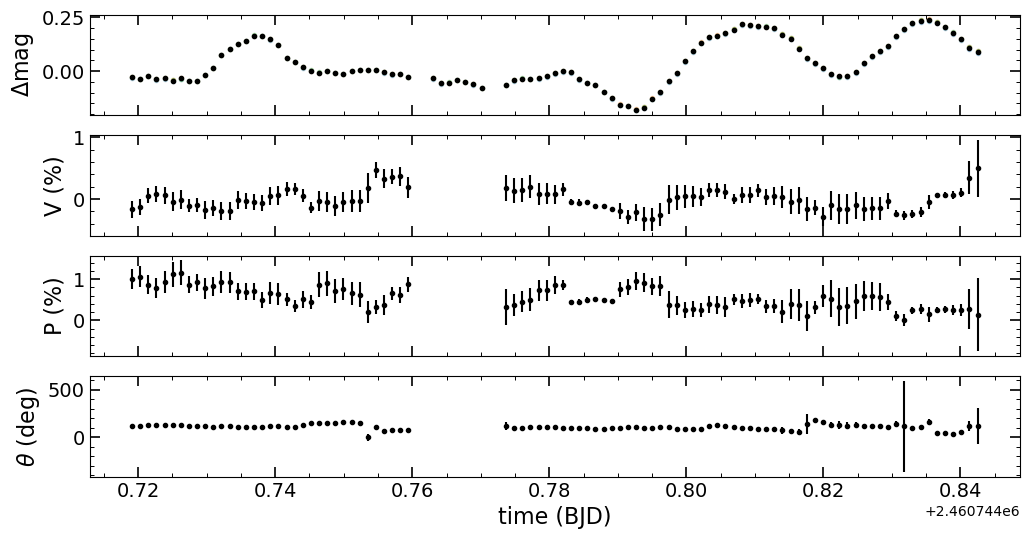

diffmag_C00000,diffmag_err_C00000,diffmag_C00001,diffmag_err_C00001,diffmag_C00002,diffmag_err_C00002,TIME,x1,y1,x2,y2,fwhm,mag,mag_err,magsum,magsum_err,diffmagsum,polarization_1,polarization_1_err,polarization_2,polarization_2_err
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
-0.029857275654871174,0.0013305772855551777,-0.028669192692118983,0.0013666579767060065,-0.02726361381428788,0.0014446209233480835,2460744.719110203,541.0343638086072,561.514475108804,559.4023740689036,525.2807249190273,5.128361315465277,-12.090863650501495,0.0012673943045760755,-14.368518974573616,0.0009519740440206272,-0.028634314050234977,0.009993466482147616,0.0024487825710124258,122.69007981723516,7.008096905720014
-0.03845772238503997,0.0013360950822616474,-0.036854713250132676,0.001371600105301404,-0.036022674126408916,0.0014488707664676611,2460744.720295796,540.2843638086072,562.514475108804,558.6523740689036,526.2807249190273,5.128361315465277,-12.081949300318044,0.0012734203129740021,-14.368104133290409,0.000949139365502639,-0.03713382295047829,0.010617906469384288,0.002434761868954243,123.88205839225294,6.558184483247694
-0.02266218456692748,0.0013192939389575931,-0.020654392509271702,0.0013554262209898222,-0.020164950797463277,0.0014332312065438678,2460744.7214812385,540.2843638086072,562.514475108804,558.6523740689036,526.2807249190273,5.098036889140937,-12.097773092248723,0.0012560337384600092,-14.367982096182176,0.0009481593604867817,-0.02118799391156756,0.008608980910321511,0.0023146608528215344,134.5554244196432,7.689562920429754
-0.039133713423380456,0.001338033263563176,-0.03744955525888116,0.0013737183164150419,-0.03683457191713657,0.0014503038272956038,2460744.7226679595,539.5343638086072,562.514475108804,557.9023740689036,526.2807249190273,5.018256486943835,-12.080746378923147,0.0012756859296185724,-14.367582545342842,0.0009479939059105673,-0.037815156397808636,0.00786165077089212,0.002512626325709147,134.5952265721769,9.14071548196321
-0.03450039769132651,0.0013309248961908167,-0.032310517683859175,0.0013668672027698106,-0.03252644802631188,0.0014434889063319118,2460744.723853958,539.5343638086072,562.514475108804,557.9023740689036,526.2807249190273,5.018256486943835,-12.085201858359401,0.0012684863039986749,-14.367313310219629,0.0009466650631109959,-0.03309044183834153,0.00918693201051218,0.002676563531876595,126.28520588630427,8.332457116704285
-0.045013089374302595,0.0013348749710224354,-0.04291560028761765,0.0013706113367978944,-0.043165114658251014,0.0014468278796602877,2460744.725039394,539.5343638086072,562.264475108804,557.9023740689036,526.0307249190273,4.892534633457845,-12.074346247404034,0.0012730202987269593,-14.367031424298851,0.0009444763074162912,-0.043664166872931176,0.011165612679149749,0.0030746580756888095,129.52784892130143,7.875539255352008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.23346938221593128,0.00106277049572022,0.24040333362484212,0.0011082261328349285,0.23953805573909825,0.0011993713943388698,2460744.8353712214,502.28436380860717,581.514475108804,520.6523740689036,545.2807249190273,4.836673093550914,-12.31851967347138,0.0009860702338062462,-14.330097568720143,0.0009376217316348381,0.2374431147731233,0.0014550653916867852,0.0017782392709953482,160.1985885257818,34.952135787870134
0.22141653181900267,0.0011014624952166905,0.22765258687198653,0.0011474527096140073,0.22740897038208985,0.0012406832188862989,2460744.8365585087,502.28436380860717,581.264475108804,520.6523740689036,545.0307249190273,4.836673093550914,-12.305115023377827,0.0010240189196834627,-14.328996963579515,0.0009608943517299468,0.22513906982019805,0.0025613395930710694,0.000663229400161369,46.73034136611539,7.405640742027462


In [16]:
s4plt.plot_polar_time_series(polar_time_series_example, 
                             target=5, 
                             comps=[1,2,3], 
                             plot_total_polarization=True, 
                             plot_polarization_angle=True)